B站：同济子豪兄：https://space.bilibili.com/1900783

微信公众号：人工智能小技巧

张子豪 2021-07-12、2021-11-25、2021-12-12

特别提醒与免责声明：人脸数据涉及公民隐私、肖像权、数据安全、数据版权，请遵守相关法律法规，不得用于违法犯罪和不道德用途。本代码仅用于教学科普，任何后果与作者无关。

# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

本代码的mediapipe版本为0.8.9.3

In [2]:
# 查看mediapipe版本
!pip show mediapipe

Name: mediapipe
Version: 0.9.0
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: d:\anaconda\lib\site-packages
Requires: numpy, flatbuffers, attrs, absl-py, opencv-contrib-python, matplotlib, protobuf
Required-by: 


In [3]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入三维人脸关键点检测模型

In [4]:
mp_face_mesh = mp.solutions.face_mesh

In [5]:
help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

In [6]:
model = mp_face_mesh.FaceMesh(   
        static_image_mode=True,      # 是静态图片还是连续视频帧
        refine_landmarks=True,       # 使用Attention Mesh模型，对嘴唇、眼睛、瞳孔周围的关键点精细定位
        max_num_faces=5,              # 最多检测几张脸
        min_detection_confidence=0.5, # 置信度阈值，越接近1越准
        min_tracking_confidence=0.5,  # 追踪阈值
)

如果代码报错，请看“导入模型时报错解决方案.html”文件

排查之后，重启本notebook的kernel，重新运行代码

In [7]:
# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# 读入图像

In [8]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person4.jpeg')

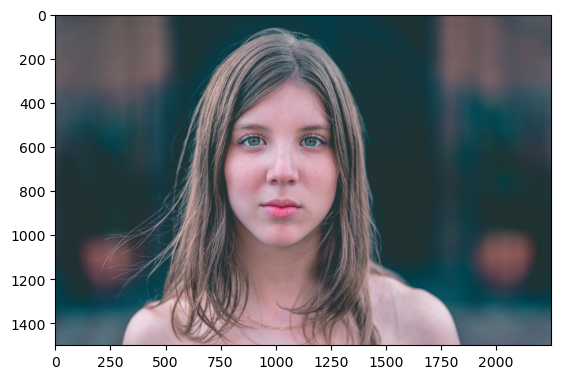

In [9]:
look_img(img)

# 将图像输入模型，获取预测结果

In [10]:
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
# 预测出脸的个数
len(results.multi_face_landmarks)

1

# 可视化人脸关键点检测效果

In [13]:
# 绘制人脸曲面和重点区域轮廓线，返回annotated_image

annotated_image = img.copy() # 复制原图，在副本上绘图可视化
if results.multi_face_landmarks: # 如果检测出人脸
    for face_landmarks in results.multi_face_landmarks: # 遍历每一张脸
        # 绘制人脸网格
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            # landmark_drawing_spec为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=[66,77,229]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            

        # 绘制脸轮廓、眼睫毛、眼眶、嘴唇
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            # landmark_drawing_spec为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=5, color=[66,77,229]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

        # 绘制瞳孔区域
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            # landmark_drawing_spec为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[10,169,77]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

In [14]:
cv2.imwrite('test.jpg',annotated_image)

True

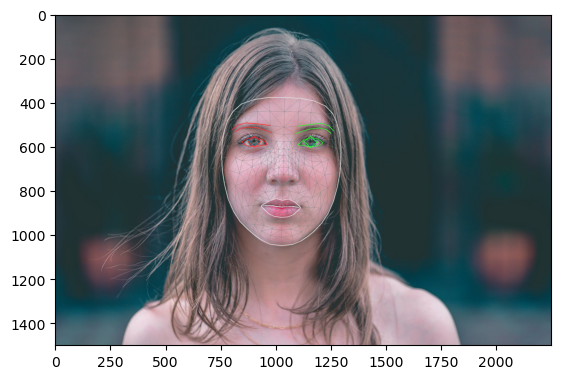

In [15]:
look_img(annotated_image)

# 在三维坐标系中可视化

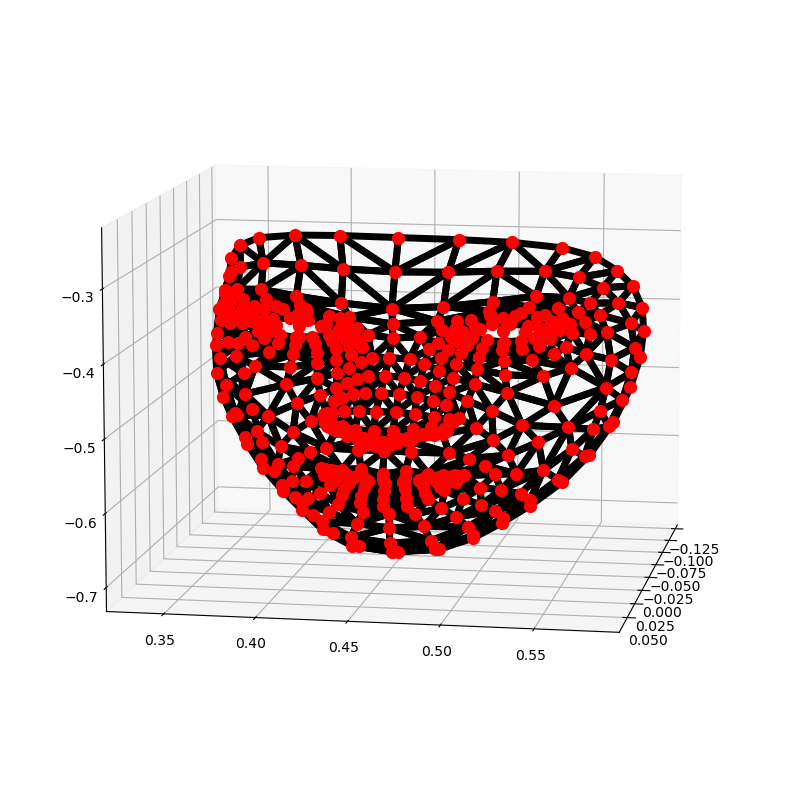

In [16]:
# 在三维坐标系中可视化
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_TESSELATION)

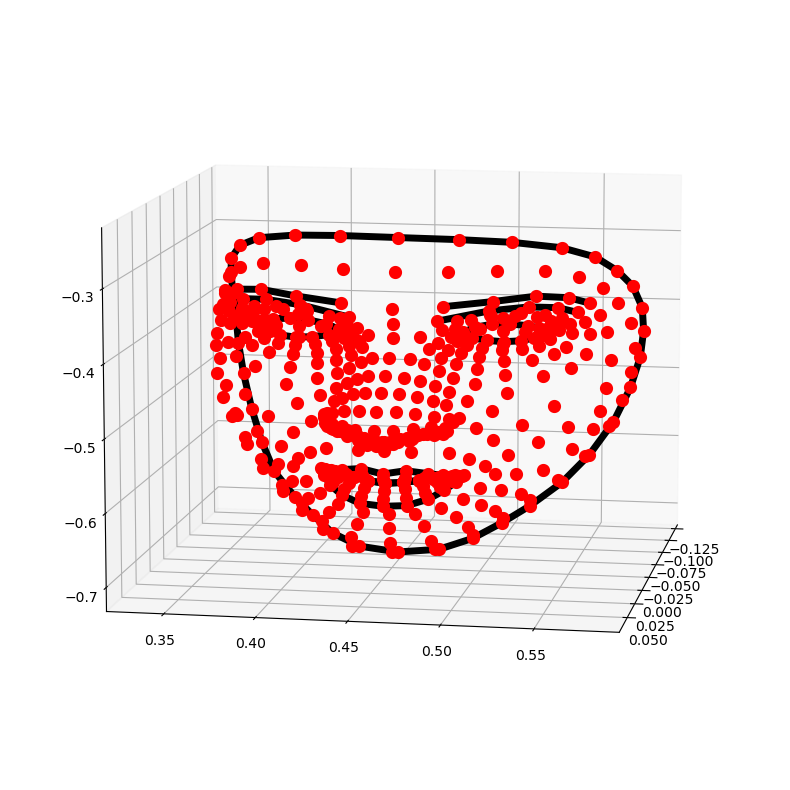

In [17]:
# 在三维坐标系中可视化
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_CONTOURS)

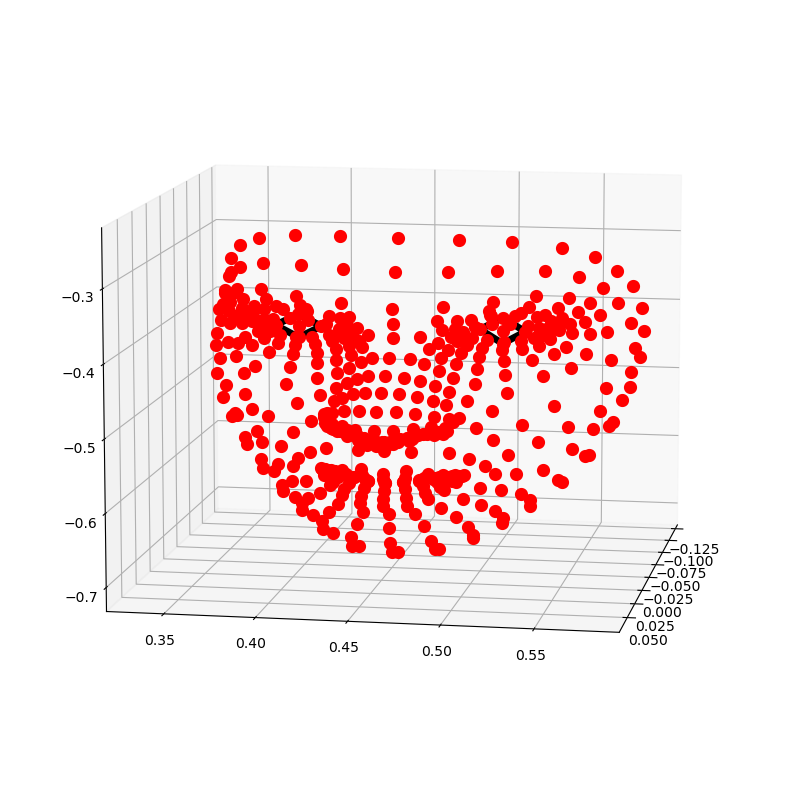

In [18]:
# 在三维坐标系中可视化
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_IRISES)

# 整理代码

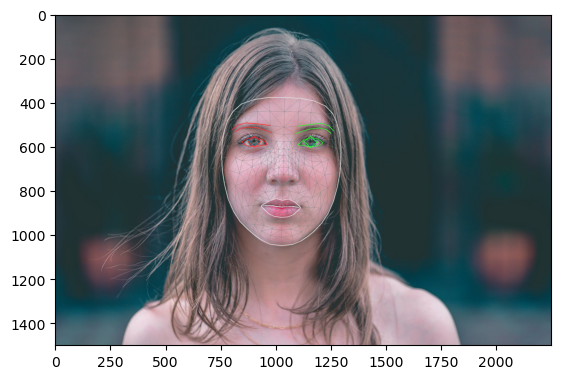

True

In [19]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 导入三维人脸关键点检测模型
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(   
        static_image_mode=True,      # 是静态图片还是连续视频帧
        refine_landmarks=True,       # 使用Attention Mesh Model，对嘴唇、眼睛、瞳孔周围的关键点精细定位
        max_num_faces=5,              # 最多检测几张脸
        min_detection_confidence=0.5, # 置信度阈值
        min_tracking_confidence=0.5,  # 追踪阈值
)

# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person4.jpeg')
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 绘制人脸曲面和重点区域轮廓线，返回annotated_image
annotated_image = img.copy() # 复制原图，在副本上绘图可视化
if results.multi_face_landmarks: # 如果检测出人脸
    for face_landmarks in results.multi_face_landmarks: # 遍历每一张脸
        # 绘制人脸网格
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            # landmark_drawing_specq为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=[66,77,229]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

        # 绘制脸轮廓、眼睫毛、眼眶、嘴唇
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            # landmark_drawing_spec为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=5, color=[66,77,229]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

        # 绘制瞳孔区域
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            # landmark_drawing_spec为关键点可视化样式，None为默认样式（不显示关键点）
            # landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[10,169,77]),
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

        
look_img(annotated_image)
cv2.imwrite('Test.jpg',annotated_image)